Quesiton Paper
![Quesiton Paper](./QuesPaper-6.jpg)

# Part C

**Link Given**- [Dermaology](https://archive.ics.uci.edu/ml/datasets/Dermatology)

---

## COE18B004

## Working
**Data Preprocessing and Transformation**
- The data is checked for data types, missing values etc. issue.
    - Issues found- Age column has missing values
    - Linear Regression to fill in some age values
    - Linear Regression Conclusion
    - Missing Values are filled into data and now data is clean
- Note that at the end of this, all the data is in int64 form.

**Data Transformation for Classification and Clustering**
- Split data into test and train

**Decision Tree Classifier**
- The train data is put into the classifier, 
- The test data is now tested on test data
- Decision Tree Classofier Conclusion

**Clustering**
- K-Means
    - Implmentation
    - Conclusion
- Hierarchical Clustering
    - Implementation
    Conclusoin
    
**PySpark - k-Means Clustering**
- PySpark Session get or Create
- PySpark K-Means Support, k= 6
- Root Mean Square for the Clustering
- Conclusion

In [1]:
import pandas as pd
import numpy as np

In [2]:
!rm dermatology.data dermatology.names

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

--2021-05-01 22:23:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25964 (25K) [application/x-httpd-php]
Saving to: ‘dermatology.data’

dermatology.data    100%[===================>]  25.36K  61.9KB/s    in 0.4s    

2021-05-01 22:23:07 (61.9 KB/s) - ‘dermatology.data’ saved [25964/25964]



In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names

--2021-05-01 22:23:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4652 (4.5K) [application/x-httpd-php]
Saving to: ‘dermatology.names’

dermatology.names   100%[===================>]   4.54K  --.-KB/s    in 0s      

2021-05-01 22:23:08 (40.7 MB/s) - ‘dermatology.names’ saved [4652/4652]



---
### Information given in other file

#### *Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)*

    1. erythema
    2. scaling
    3. definite borders
    4. itching
    5. koebner phenomenon
    6. polygonal papules
    7. follicular papules
    8. oral mucosal involvement
    9. knee and elbow involvement
    10. scalp involvement
    11. family history, (0 or 1)
    34. Age (linear)

#### *Histopathological Attributes: (take values 0, 1, 2, 3)*
    12. melanin incontinence
    13. eosinophils in the infiltrate
    14. PNL infiltrate
    15. fibrosis of the papillary dermis
    16. exocytosis
    17. acanthosis
    18. hyperkeratosis
    19. parakeratosis
    20. clubbing of the rete ridges
    21. elongation of the rete ridges
    22. thinning of the suprapapillary epidermis
    23. spongiform pustule
    24. munro microabcess
    25. focal hypergranulosis
    26. disappearance of the granular layer
    27. vacuolisation and damage of basal layer
    28. spongiosis
    29. saw-tooth appearance of retes
    30. follicular horn plug
    31. perifollicular parakeratosis
    32. inflammatory monoluclear inflitrate
    33. band-like infiltrate

#### Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'.
    (from dertermatology.names -- data description file)

#### **Class Distribution**:
       Database:  Dermatology
       
       Class code:   Class:                  Number of instances:
       1             psoriasis			             112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20


---

In [5]:
col_header = [
    "erythema", 
    "scaling", 
    "definite borders", 
    "itching", 
    "koebner phenomenon", 
    "polygonal papules", 
    "follicular papules", 
    "oral mucosal involvement", 
    "knee and elbow involvement", 
    "scalp involvement", 
    "family history", 
    "melanin incontinence", 
    "eosinophils in the infiltrate", 
    "PNL infiltrate", 
    "fibrosis of the papillary dermis", 
    "exocytosis", 
    "acanthosis", 
    "hyperkeratosis", 
    "parakeratosis", 
    "clubbing of the rete ridges", 
    "elongation of the rete ridges", 
    "thinning of the suprapapillary epidermis", 
    "spongiform pustule", 
    "munro microabcess", 
    "focal hypergranulosis", 
    "disappearance of the granular layer", 
    "vacuolisation and damage of basal layer", 
    "spongiosis", 
    "saw-tooth appearance of retes", 
    "follicular horn plug", 
    "perifollicular parakeratosis", 
    "inflammatory monoluclear inflitrate", 
    "band-like infiltrate",
    "Age",
    "Class"
]
class_codes = {
    1: "psoriasis",
    2: "seboreic dermatitis",
    3: "lichen planus",
    4: "pityriasis rosea",
    5: "cronic dermatitis",
    6: "pityriasis rubra pilaris"
}

In [6]:
data = pd.read_csv('dermatology.data', index_col= False, names= col_header)

### My Understanding of Data
- The above contains contains data converted to numerical category.
- The last column imported contains the class code for skin diseases
- The data contains mostly 0 - 3 numbers in different attributes, so the Closed-FPI on this dataset would be not be of much use as out of 32 attributes within 0-3, 1 attribute 0-1 the chances are that all the values from 0-3 are there in the itemset considered


### Data Pre-Processing

- Cleaning/Integration

In [7]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [8]:
"""
from data description we know the missing values in the data are 8 in number and are in column
So better remove these values first and then verify this the data is all numeric
"""
missing_val = data.index[data.Age == '?']
print("Missing Column indices:", *missing_val)

Missing Column indices: 33 34 35 36 262 263 264 265


In [9]:
data_missing_age = data.iloc[missing_val]
data_missing_age

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [10]:
"""
verify that the other values are fine-- all other values are int
"""
print(data.dtypes)

"""Conclusion from the output, all other than age are integers"""
for i in data.index:
    if i not in missing_val:
        data.Age[i] = int(data.Age[i])
"""
No error output---> all other than age can be converted to integers, hence are fine
"""
print(data.Age)

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history                               int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing of the rete ridges    

/home/anant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Linear Regression for Age prediction

In [11]:
"""
Add/remove the missing values-
from the description contents it is clear that the only attribute having missing values is Age.

Better options- Predict the age from the given values using a Regression model
"""

from sklearn.linear_model import LinearRegression

In [12]:
lin_reg_input = data[~data.index.isin(missing_val)]

In [13]:
"""
All columns taken except age
"""
X = lin_reg_input[[*col_header[:-2], col_header[-1]]].values
"""
Shape should 358 x 34
"""
X.shape

(358, 34)

In [14]:
X

array([[2, 2, 0, ..., 1, 0, 2],
       [3, 3, 3, ..., 1, 0, 1],
       [2, 1, 2, ..., 2, 3, 3],
       ...,
       [3, 2, 2, ..., 2, 3, 3],
       [2, 1, 3, ..., 2, 3, 3],
       [3, 2, 2, ..., 3, 0, 1]])

In [15]:
"""
the prediction or age == col_header[-2]
"""
# y = np.array(list(map(int, lin_reg_input[col_header[-2]].values)))
y = lin_reg_input[col_header[-2]].values
"""
Shape should 358 x 1
"""
y.shape

(358,)

In [16]:
y

array([55, 8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 22, 10, 65, 40, 30,
       38, 23, 17, 8, 51, 42, 44, 22, 33, 10, 17, 43, 50, 50, 10, 34, 15,
       26, 46, 51, 62, 15, 35, 30, 48, 46, 12, 52, 60, 32, 35, 41, 48, 51,
       19, 22, 29, 25, 33, 8, 40, 33, 42, 36, 60, 36, 21, 40, 21, 34, 13,
       52, 48, 17, 25, 33, 62, 52, 27, 40, 31, 27, 10, 55, 30, 42, 48, 22,
       31, 50, 43, 30, 42, 22, 18, 35, 60, 28, 13, 20, 64, 43, 20, 34, 39,
       60, 38, 44, 36, 41, 18, 39, 40, 47, 16, 27, 52, 25, 0, 33, 46, 7,
       30, 29, 23, 8, 44, 17, 16, 55, 40, 34, 29, 34, 25, 70, 37, 41, 32,
       20, 19, 61, 27, 36, 40, 52, 27, 30, 45, 34, 27, 46, 52, 28, 40, 55,
       32, 33, 47, 35, 61, 22, 10, 20, 55, 67, 51, 20, 22, 45, 55, 56, 18,
       40, 30, 33, 40, 42, 36, 27, 56, 60, 20, 7, 30, 19, 52, 55, 23, 50,
       38, 25, 18, 35, 22, 52, 50, 33, 44, 18, 25, 52, 35, 40, 55, 20, 60,
       33, 27, 50, 70, 28, 30, 53, 27, 50, 42, 45, 35, 30, 42, 18, 25, 36,
       40, 35, 19, 50, 47, 30, 4

In [17]:
reg_model = LinearRegression().fit(X, y)

In [18]:
print(reg_model.score(X, y))
"""weak model hence a attribute selection hence better attribute selection"""

0.20708204530924734


'weak model hence a attribute selection hence better attribute selection'

In [19]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR
estimator = LinearSVR(max_iter= 1000)
selector = RFE(estimator, n_features_to_select= 15, step= 1, verbose= True)
selector.fit(X, y)
selector.support_

Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


array([False, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False])

In [20]:
X[:, selector.support_].shape

(358, 15)

In [21]:
reg_model = LinearRegression().fit(X[:, selector.support_], y)

In [22]:
reg_model.score(X[:, selector.support_], y)

0.19388012851833236

**Linear Regression Conclusion**

Tried for different values of k, but R2 score is still very less, (less than 0.5, not even moderately good),
conclusion Linear Regression is not a good predictor for this data input and output pair.

---

Fill the values predicted by regressor into data

In [23]:
X_test = data_missing_age[[*col_header[:-2], col_header[-1]]].values[:, selector.support_]
y_pred = reg_model.predict(X_test)
print("Linear Regression Predicted Age:", y_pred)

Linear Regression Predicted Age: [37.16577552 33.81500634 36.28343569 36.8615573  35.77513881 39.02692596
 37.32602885 35.77513881]


In [24]:
"""
The data is now updated back into the original data
"""
for i, index in enumerate(data_missing_age.index):
    data.Age[index] = int(y_pred[i])
data.Age = data.Age.astype(int)

/home/anant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
data.dtypes

erythema                                    int64
scaling                                     int64
definite borders                            int64
itching                                     int64
koebner phenomenon                          int64
polygonal papules                           int64
follicular papules                          int64
oral mucosal involvement                    int64
knee and elbow involvement                  int64
scalp involvement                           int64
family history                              int64
melanin incontinence                        int64
eosinophils in the infiltrate               int64
PNL infiltrate                              int64
fibrosis of the papillary dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing of the rete ridges                 int64


**Data preprocessing completed**

---

### Data Transformation

In [26]:
"""
data transformation for Classification and Clustering Implementations
"""
from sklearn.model_selection import train_test_split

In [27]:
X = data[col_header[:-1]].values
y = data[col_header[-1]].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Decision Tree Classifier

In [29]:
from sklearn import tree
decision_tree_classifier = tree.DecisionTreeClassifier().fit(X_train, y_train)

[Text(256.9395348837209, 208.38, 'X[21] <= 0.5\ngini = 0.794\nsamples = 292\nvalue = [94, 45, 56, 38, 44, 15]'),
 Text(225.7953488372093, 190.26, 'X[26] <= 0.5\ngini = 0.783\nsamples = 199\nvalue = [3, 44, 56, 38, 43, 15]'),
 Text(210.2232558139535, 172.14, 'X[14] <= 0.5\ngini = 0.736\nsamples = 144\nvalue = [3, 44, 1, 38, 43, 15]'),
 Text(179.07906976744187, 154.01999999999998, 'X[4] <= 0.5\ngini = 0.639\nsamples = 100\nvalue = [3, 44, 0, 38, 0, 15]'),
 Text(163.50697674418603, 135.89999999999998, 'X[30] <= 0.5\ngini = 0.544\nsamples = 70\nvalue = [3, 44, 0, 8, 0, 15]'),
 Text(124.57674418604651, 117.77999999999999, 'X[25] <= 0.5\ngini = 0.341\nsamples = 54\nvalue = [3, 43, 0, 8, 0, 0]'),
 Text(93.43255813953488, 99.66, 'X[19] <= 1.0\ngini = 0.158\nsamples = 47\nvalue = [1, 43, 0, 3, 0, 0]'),
 Text(77.86046511627907, 81.53999999999999, 'X[17] <= 1.5\ngini = 0.122\nsamples = 46\nvalue = [0, 43, 0, 3, 0, 0]'),
 Text(62.288372093023256, 63.41999999999999, 'X[33] <= 61.5\ngini = 0.085\nsa

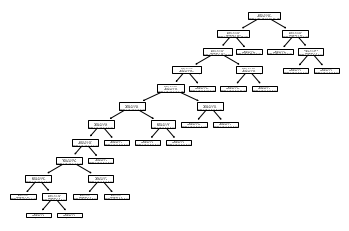

In [30]:
tree.plot_tree(decision_tree_classifier)

In [31]:
y_pred = decision_tree_classifier.predict(X_test)

In [32]:
y_pred

array([3, 3, 2, 1, 3, 3, 2, 3, 1, 5, 2, 1, 3, 5, 1, 2, 1, 3, 1, 3, 6, 6,
       5, 2, 4, 4, 2, 3, 4, 5, 2, 1, 1, 4, 1, 1, 6, 5, 1, 4, 3, 1, 4, 5,
       2, 4, 4, 2, 3, 4, 4, 3, 4, 4, 2, 6, 1, 6, 3, 3, 3, 2, 5, 1, 3, 1,
       1, 4, 1, 4, 5, 1, 2, 2])

In [33]:
correct_classification_count = np.count_nonzero(y_pred == y_test)

In [34]:
accuracy = correct_classification_count / len(y_pred)
print("Test Accuracy=", accuracy)

Test Accuracy= 0.9594594594594594


In [35]:
"""
Very High accuracy on test set
--- 
Accuracy for train set needs to be there too
"""

y_pred = decision_tree_classifier.predict(X_test)
correct_classification_count = np.count_nonzero(y_pred == y_test)
accuracy = correct_classification_count / len(y_pred)
print("Train Accuracy=", accuracy)

Train Accuracy= 0.9594594594594594


**Decision Tree Conclusions**
- The accuracy is very high for default parameters:
    - The not enough data points.
---

### Clustering

In [36]:
from sklearn.cluster import KMeans
kmeans_classifier = KMeans(n_clusters= 6, ).fit(X_train)

In [37]:
kmeans_classifier.labels_

array([0, 1, 1, 3, 1, 0, 0, 1, 3, 1, 3, 5, 1, 5, 4, 3, 2, 5, 2, 0, 5, 1,
       0, 0, 3, 0, 1, 0, 1, 5, 0, 2, 4, 3, 5, 0, 0, 3, 1, 1, 5, 0, 1, 3,
       2, 2, 4, 2, 0, 1, 1, 4, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2,
       5, 2, 2, 1, 5, 1, 3, 2, 1, 0, 0, 0, 4, 3, 3, 1, 2, 0, 1, 3, 1, 0,
       1, 4, 0, 0, 1, 0, 3, 3, 1, 2, 0, 3, 4, 3, 1, 0, 4, 3, 0, 2, 1, 0,
       3, 0, 3, 0, 1, 0, 2, 3, 3, 1, 0, 3, 1, 5, 0, 2, 1, 5, 3, 3, 2, 4,
       1, 4, 4, 4, 1, 1, 0, 2, 1, 4, 3, 1, 1, 0, 0, 0, 0, 3, 3, 3, 2, 4,
       3, 5, 1, 1, 1, 1, 3, 0, 1, 2, 2, 3, 2, 2, 2, 2, 1, 0, 5, 2, 0, 4,
       1, 3, 4, 5, 0, 3, 1, 4, 4, 1, 3, 1, 5, 3, 2, 5, 4, 1, 4, 3, 1, 3,
       0, 3, 4, 1, 2, 3, 0, 2, 0, 0, 4, 0, 3, 3, 0, 1, 0, 1, 0, 1, 2, 5,
       2, 0, 2, 1, 5, 2, 2, 1, 0, 3, 4, 4, 3, 0, 4, 0, 1, 2, 2, 3, 2, 5,
       0, 1, 3, 1, 0, 1, 3, 2, 4, 3, 3, 3, 5, 1, 4, 2, 0, 3, 2, 0, 4, 2,
       5, 2, 0, 3, 0, 0, 1, 3, 3, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 3, 3, 3,
       2, 0, 0, 3, 3, 0], dtype=int32)

In [38]:
from itertools import permutations 

def remap_labels(pred_labels, true_labels):
    """
    Code by- https://stackoverflow.com/users/9988487/adomas-baliuka
    """
    """Rename prediction labels (clustered output) to best match true labels."""
    # from itertools import permutations # import this into script.
    pred_labels, true_labels = np.array(pred_labels), np.array(true_labels)
    assert pred_labels.ndim == 1 == true_labels.ndim
    assert len(pred_labels) == len(true_labels)
    cluster_names = np.unique(pred_labels)
    accuracy = 0

    perms = np.array(list(permutations(np.unique(true_labels))))

    remapped_labels = true_labels
    for perm in perms:
        flipped_labels = np.zeros(len(true_labels))
        for label_index, label in enumerate(cluster_names):
            flipped_labels[pred_labels == label] = perm[label_index]

        testAcc = np.sum(flipped_labels == true_labels) / len(true_labels)
        if testAcc > accuracy:
            accuracy = testAcc
            remapped_labels = flipped_labels
    return accuracy, remapped_labels

In [39]:
"""
Even when taking the best mapped fit for label
"""
remap_labels(kmeans_classifier.labels_, y_train)

(0.2808219178082192,
 array([1., 5., 5., 3., 5., 1., 1., 5., 3., 5., 3., 6., 5., 6., 4., 3., 2.,
        6., 2., 1., 6., 5., 1., 1., 3., 1., 5., 1., 5., 6., 1., 2., 4., 3.,
        6., 1., 1., 3., 5., 5., 6., 1., 5., 3., 2., 2., 4., 2., 1., 5., 5.,
        4., 6., 1., 1., 1., 1., 1., 5., 1., 5., 5., 1., 1., 2., 2., 6., 2.,
        2., 5., 6., 5., 3., 2., 5., 1., 1., 1., 4., 3., 3., 5., 2., 1., 5.,
        3., 5., 1., 5., 4., 1., 1., 5., 1., 3., 3., 5., 2., 1., 3., 4., 3.,
        5., 1., 4., 3., 1., 2., 5., 1., 3., 1., 3., 1., 5., 1., 2., 3., 3.,
        5., 1., 3., 5., 6., 1., 2., 5., 6., 3., 3., 2., 4., 5., 4., 4., 4.,
        5., 5., 1., 2., 5., 4., 3., 5., 5., 1., 1., 1., 1., 3., 3., 3., 2.,
        4., 3., 6., 5., 5., 5., 5., 3., 1., 5., 2., 2., 3., 2., 2., 2., 2.,
        5., 1., 6., 2., 1., 4., 5., 3., 4., 6., 1., 3., 5., 4., 4., 5., 3.,
        5., 6., 3., 2., 6., 4., 5., 4., 3., 5., 3., 1., 3., 4., 5., 2., 3.,
        1., 2., 1., 1., 4., 1., 3., 3., 1., 5., 1., 5., 1., 5., 2.,

**Conclusions KMeans Clustering**
- The accuracy is very low:
    - KMeans is not a good Clustering for this
    - The dataset is uneven(not same sized data), hence k-means is not good 
---    

### Hierarchical Clustering

In [40]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_classifier = AgglomerativeClustering(n_clusters= 6).fit(X_train)

In [41]:
hierarchical_classifier.labels_

array([2, 0, 0, 1, 0, 2, 3, 0, 1, 0, 1, 5, 0, 5, 4, 1, 0, 5, 0, 2, 5, 0,
       3, 3, 1, 2, 0, 2, 0, 5, 3, 0, 4, 1, 2, 3, 3, 1, 3, 0, 5, 3, 0, 1,
       0, 0, 4, 0, 3, 0, 3, 4, 2, 3, 2, 2, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0,
       5, 0, 0, 0, 5, 0, 1, 0, 0, 2, 2, 3, 4, 1, 1, 0, 1, 3, 0, 1, 0, 2,
       0, 1, 3, 3, 0, 3, 1, 1, 0, 0, 2, 1, 4, 1, 0, 2, 4, 1, 3, 0, 0, 2,
       1, 2, 1, 2, 0, 3, 0, 1, 1, 0, 2, 1, 0, 5, 2, 0, 0, 2, 1, 1, 0, 1,
       0, 4, 4, 4, 3, 0, 3, 0, 3, 4, 4, 0, 0, 2, 3, 3, 2, 1, 1, 1, 0, 4,
       1, 2, 3, 0, 3, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 5, 0, 3, 4,
       3, 1, 4, 5, 3, 1, 0, 4, 4, 0, 1, 0, 5, 4, 0, 5, 4, 0, 4, 1, 0, 1,
       3, 1, 4, 0, 0, 1, 3, 0, 2, 2, 4, 3, 1, 1, 2, 0, 2, 3, 3, 3, 1, 5,
       0, 2, 0, 0, 5, 0, 0, 3, 3, 1, 4, 1, 1, 3, 4, 2, 0, 0, 0, 1, 0, 5,
       3, 0, 1, 0, 3, 0, 1, 0, 4, 1, 1, 0, 2, 0, 4, 0, 3, 1, 0, 2, 4, 0,
       2, 0, 3, 1, 3, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 1, 1, 1,
       0, 2, 3, 0, 1, 3])

In [42]:
remap_labels(hierarchical_classifier.labels_, y_train)

(0.2945205479452055,
 array([4., 2., 2., 1., 2., 4., 3., 2., 1., 2., 1., 6., 2., 6., 5., 1., 2.,
        6., 2., 4., 6., 2., 3., 3., 1., 4., 2., 4., 2., 6., 3., 2., 5., 1.,
        4., 3., 3., 1., 3., 2., 6., 3., 2., 1., 2., 2., 5., 2., 3., 2., 3.,
        5., 4., 3., 4., 4., 4., 3., 2., 3., 3., 3., 3., 3., 2., 2., 6., 2.,
        2., 2., 6., 2., 1., 2., 2., 4., 4., 3., 5., 1., 1., 2., 1., 3., 2.,
        1., 2., 4., 2., 1., 3., 3., 2., 3., 1., 1., 2., 2., 4., 1., 5., 1.,
        2., 4., 5., 1., 3., 2., 2., 4., 1., 4., 1., 4., 2., 3., 2., 1., 1.,
        2., 4., 1., 2., 6., 4., 2., 2., 4., 1., 1., 2., 1., 2., 5., 5., 5.,
        3., 2., 3., 2., 3., 5., 5., 2., 2., 4., 3., 3., 4., 1., 1., 1., 2.,
        5., 1., 4., 3., 2., 3., 2., 1., 3., 2., 2., 2., 1., 2., 2., 2., 2.,
        2., 3., 6., 2., 3., 5., 3., 1., 5., 6., 3., 1., 2., 5., 5., 2., 1.,
        2., 6., 5., 2., 6., 5., 2., 5., 1., 2., 1., 3., 1., 5., 2., 2., 1.,
        3., 2., 4., 4., 5., 3., 1., 1., 4., 2., 4., 3., 3., 3., 1.,

**Conclusions KMeans Clustering**
- The accuracy is very low:
    - Not a good choice for this 
---

## PySpark Implementation

In [43]:
import sys
import os
os.environ['SPARK_HOME'] = '/opt/spark'
# SparkContext is available as sc and HiveContext is available as sqlContext.
sys.path.append('/opt/spark/python')
sys.path.append('/opt/spark/data')


In [44]:
import findspark
# sc.stop()
from pyspark import SparkContext
spark = SparkSession \
    .builder \
    .enableHiveSupport() \
    .getOrCreate()

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))


In [45]:
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel

# Load and parse the data
data = sc.textFile("dermatology.data")

"""
returns all the complete data without the class and Age--- [:-2] 
"""
    
parsedData = data.map(lambda line: np.array([int(x) for x in line.split(',')[:-2]]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, k= 6, maxIterations=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sum([x**2 for x in (point - center)])

sum_sq = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)

print("Root of Squared Error = ", sqrt(sum_sq / 365))


Root of Squared Error =  3.095812325252097


**Conclusion PySpark K-Means Cluster**
- The root mean square value for the above is high
    - K Means is not a good choice for the dataset
    - The dataset is uneven(not same sized data), hence k-means is not good 

---------